In [22]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [18]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them

path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Beginning stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,1975.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
1,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2008/09,Est.,Annual,5540.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
2,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,488.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
3,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2008/09,Est.,Annual,1367.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
4,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2008/09,Est.,Annual,160.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4


In [44]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
gold_df = pd.read_csv('data collection/Gold Futures Historical Data - daily data 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    'soybean_df': soybean_df
}

In [46]:
# Identify and drop columns that start with "Unnamed"
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4


Overview of crude_oil_df


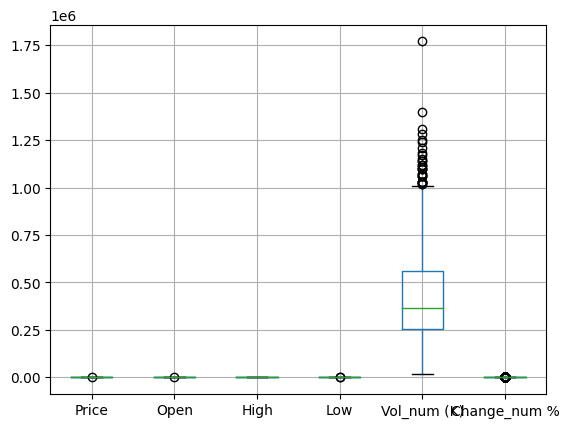

Overview of gold_df


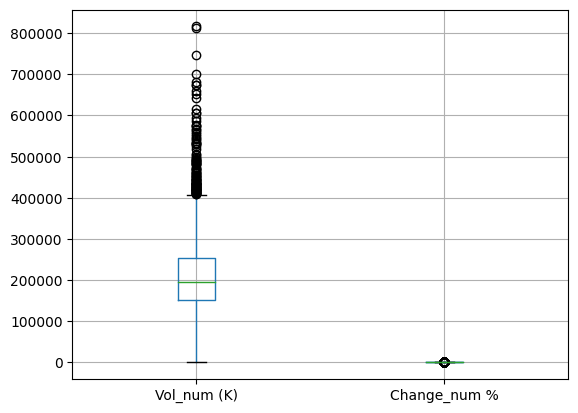

Overview of sp500_df


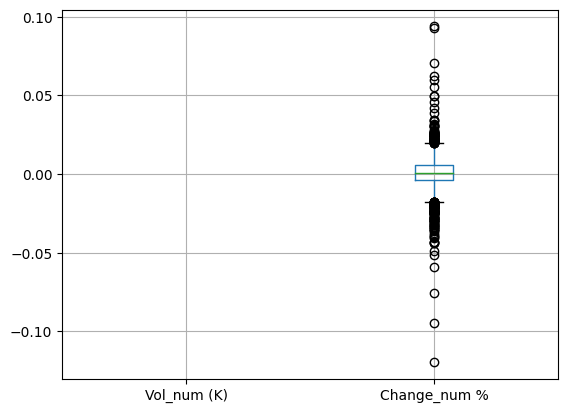

Overview of silver_df


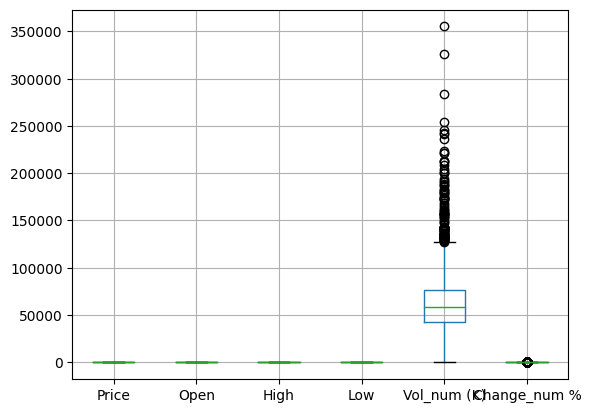

Overview of corn_df


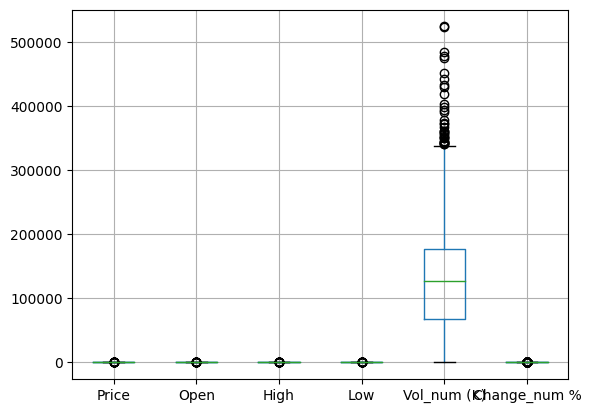

Overview of dollar_rate_df


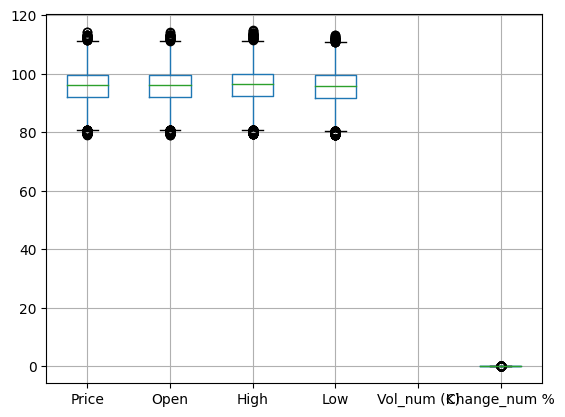

Overview of soybean_df


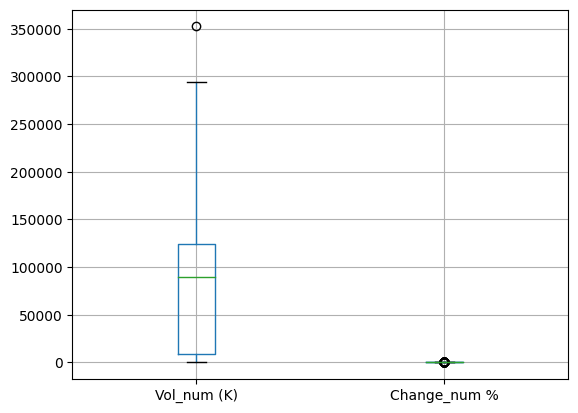

In [42]:
# present a basic data exploration in each df including a sample of the data, the data types, and the number of missing values ALSO check for duplicates and show the values in a boxplot
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if '%' in value:
        return float(value.replace('%', '')) / 100
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    
 
for df_name, df in dfs_dict.items():
    try:
        df['Vol_num (K)'] = df['Vol.'].apply(replace_symbols)
        df['Change_num %'] = df['Change %'].apply(replace_symbols)
        print(f"Overview of {df_name}")
        plt.figure()
        df[['Price', 'Open', 'High', 'Low', 'Vol_num (K)', 'Change_num %']].boxplot()
        plt.show()
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



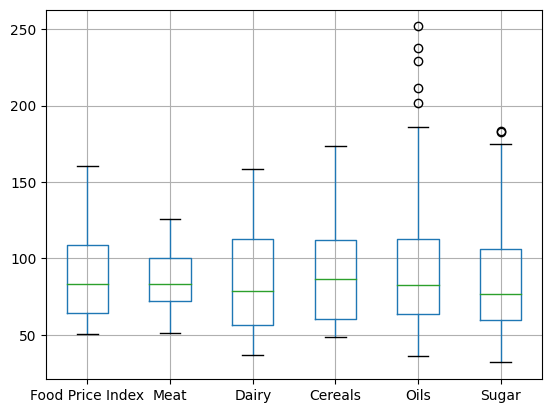

In [47]:
food_price_df.boxplot()
plt.show()